# [作業目標]  
對資料做更多處理 : 顯示特定欄位的統計值與直方圖  

# [作業重點]   
試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())    
試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())    

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.info())
app_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# 練習時間  
觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息  

Eg  
計算任意欄位的平均數及標準差  
畫出任意欄位的直方圖  
Hints:  
Descriptive Statistics For pandas Dataframe  
pandas 中的繪圖函數  

In [4]:
#計算任意欄位的平均數及標準差
feature = 'AMT_INCOME_TOTAL'
print('Feature: %s' %feature)
print('Mean of %s: %.3f' %(feature, app_train[feature].mean()))
print('Standard deviation of %s: %.3f' %(feature, app_train[feature].std()))

Feature: AMT_INCOME_TOTAL
Mean of AMT_INCOME_TOTAL: 168797.919
Standard deviation of AMT_INCOME_TOTAL: 237123.146


#--- TARGET x CONTRACT_TYPE  
貸款種類對於Target上，比例上相似沒有太大差異

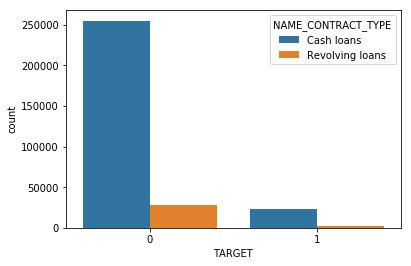

In [5]:
sns.countplot(app_train['TARGET'], hue=app_train['NAME_CONTRACT_TYPE'])

#--- TARGET x CODE_GENDER  
資料母體中，女性貸款人數較高，不過男性有付款困難的比例較高

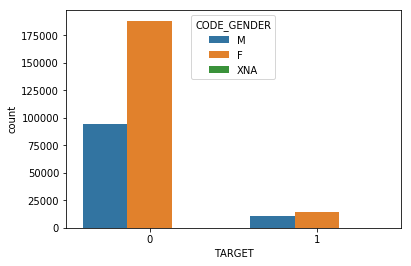

In [7]:
sns.countplot(app_train['TARGET'], hue=app_train['CODE_GENDER'])

#---Target x AMT_INCOME_TOTAL  
從散佈圖中Target為1的，在總收入上呈現非常兩極的分布。收入低無法繳款，其貸款原因可能是為了生活費；收入高無法繳款，則可能是投資或是公司用款。

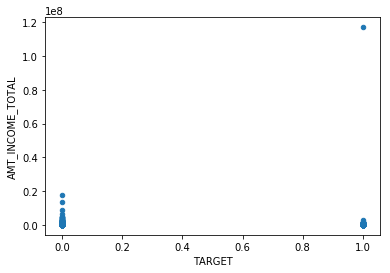

In [13]:
app_train.plot.scatter(x='TARGET', y='AMT_INCOME_TOTAL')

In [8]:
for feature in app_train.columns:
    if app_train[feature].dtype != 'object':
        corr = app_train['TARGET'].corr(app_train[feature])
        if abs(corr)>=0.06:
            print(feature, corr)

TARGET 1.0
DAYS_BIRTH 0.07823930830982712
REGION_RATING_CLIENT_W_CITY 0.0608926675648237
EXT_SOURCE_1 -0.15531712606394854
EXT_SOURCE_2 -0.16047167160521014
EXT_SOURCE_3 -0.17891869762837137


In [14]:
# 方法一：使用groupby
app_train['AMT_INCOME_TOTAL'].groupby([app_train['CODE_GENDER'], app_train['NAME_CONTRACT_TYPE']]).mean()
# 方法二：使用pivot_table
app_train.pivot_table(values ='AMT_INCOME_TOTAL', index=['CODE_GENDER','NAME_CONTRACT_TYPE'])

AMT_INCOME_TOTAL
CODE_GENDER NAME_CONTRACT_TYPE                  
F           Cash loans             156863.729543
            Revolving loans        148296.986055
M           Cash loans             192449.693400
            Revolving loans        202781.954706
XNA         Revolving loans        186750.000000